In [2]:
import numpy as np
import matplotlib.pyplot as plt

import utilities

In [8]:
def plot_series(series, time=None, line='-', start=0, end=None, label=None):
    fig, ax = plt.subplots()
    
    if time is None:
        time = range(len(series))
    ax.plot(time[start:end], series[start:end], line, label=label)
    utilities.set_ax(ax, xlabel='Time', legend=label is not None, grid=True)

In [6]:
def trend(time, slope=0):
    return slope * time

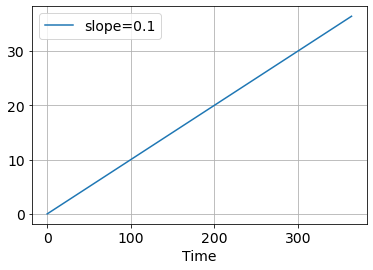

In [11]:
time = np.arange(365)
slope = 0.1
s_trend = trend(time, slope=slope)
plot_series(s_trend, time, label=f'slope={slope:.3g}')

In [13]:
pattern = lambda t: np.where(t < 0.4, np.cos(2*np.pi*t), np.exp(-3*t))

def pattern2series(pattern, time, period, amp=1, phase=0):
    return amp*pattern((time/period + phase) % 1)

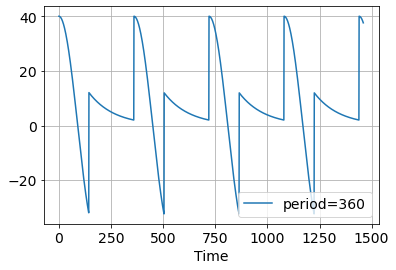

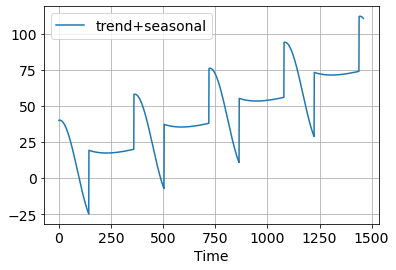

In [22]:
period = 360
time = np.arange(4*365 + 1)

s_season = pattern2series(pattern, time, period, amp=40)
plot_series(s_season, time, label=f'period={period}')

s_ts = s_season + trend(time, 0.05)
plot_series(s_ts, time, label='trend+seasonal')

In [20]:
def noise(time, noise_std=1, rng=np.random.RandomState(0)):
    return rng.randn(len(time)) * noise_std

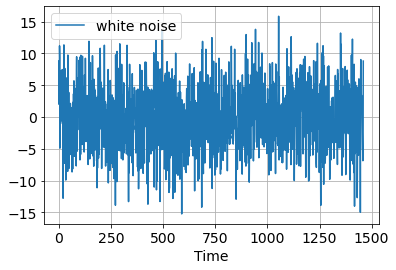

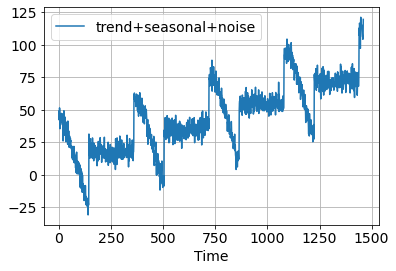

In [23]:
s_noise = noise(time, noise_std=5)
plot_series(s_noise, time, label='white noise')

s_tsn = s_ts + s_noise
plot_series(s_tsn, time, label='trend+seasonal+noise')

In [38]:
def autocor(time, lags, coefs, noise_std=1, ini=0, rng=np.random.RandomState(0)):
    maxlag = max(lags)
    s = rng.randn(maxlag + len(time)) * noise_std
    s[:maxlag] += ini
    for i in range(maxlag, maxlag + len(time)):
        s[i] += sum(c*s[i-lag]for lag, c in zip(lags, coefs))
    return s[maxlag:]

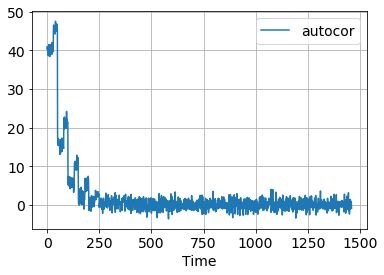

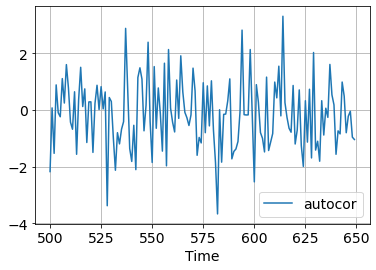

In [43]:
s_ac = autocor(time, lags=[30, 50], coefs=[-0.1, 0.5], ini=100)
plot_series(s_ac, time, label='autocor')
plot_series(s_ac, time, start=500, end=650, label='autocor')

In [42]:
def autocor2(time, coef, noise_std=1, rng=np.random.RandomState(0)):
    s = rng.randn(len(time)) * noise_std
    for i in range(1, len(time)):
        s[i] += coef * s[i-1]
    return s

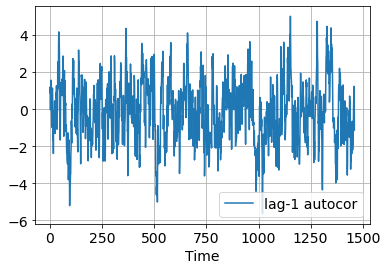

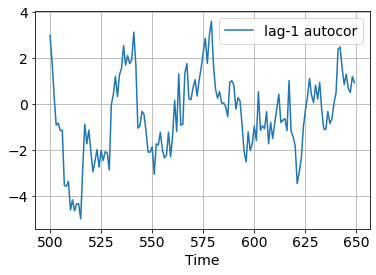

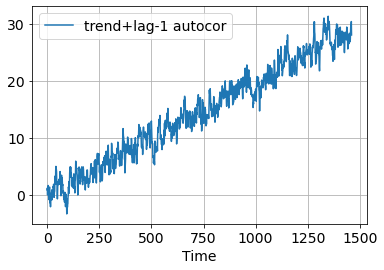

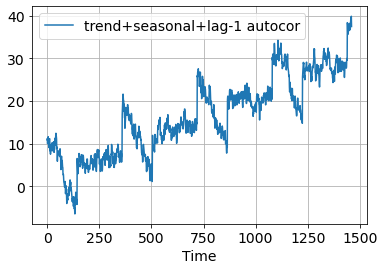

In [101]:
s_ac2 = autocor2(time, 0.8)
plot_series(s_ac2, time, label='lag-1 autocor')
plot_series(s_ac2, time, start=500, end=650, label='lag-1 autocor')
plot_series(s_ac2 + trend(time, 0.02), time, label='trend+lag-1 autocor')
plot_series(s_ac2 + trend(time, 0.02) + pattern2series(pattern, time, period, amp=10),
            time, label='trend+seasonal+lag-1 autocor')

In [80]:
def impulse(time, num, amp=1, rng=np.random.RandomState(0)):
    ind = rng.choice(np.arange(len(time)), num, replace=False)
    s = np.zeros_like(time, dtype=np.float64)
    s[ind] += rng.rand(num) * amp
    return s

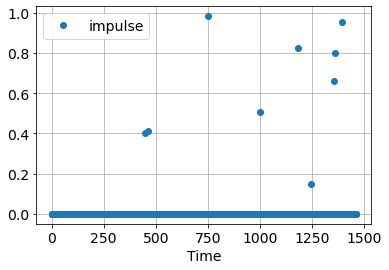

In [85]:
s_imp = impulse(time, 10)
plot_series(s_imp, time, line='o', label='impulse')

In [84]:
def autocor3(series, lagcoef):
    s = series.copy()
    for i, _ in enumerate(s):
        s[i] += sum(coef * s[i-lag] for lag, coef in lagcoef.items() if i >= lag)
    return s

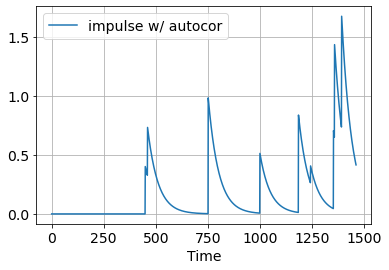

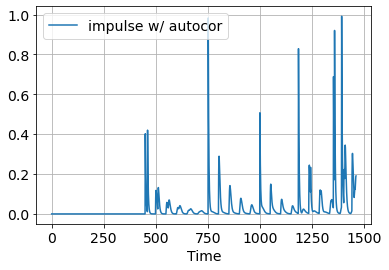

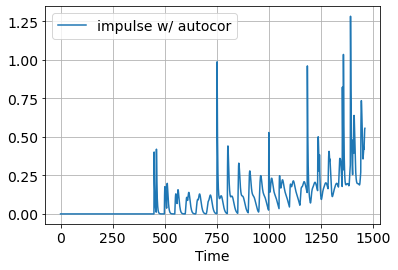

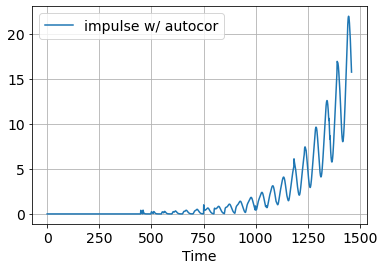

In [94]:
s_autoimp = autocor3(s_imp, {1: 0.98})
plot_series(s_autoimp, time, label='impulse w/ autocor')

s_autoimp = autocor3(s_imp, {1: 0.7, 50: 0.2})
plot_series(s_autoimp, time, label='impulse w/ autocor')

s_autoimp = autocor3(s_imp, {1: 0.7, 50: 0.3})
plot_series(s_autoimp, time, label='impulse w/ autocor')

s_autoimp = autocor3(s_imp, {1: 0.7, 50: 0.4})
plot_series(s_autoimp, time, label='impulse w/ autocor')

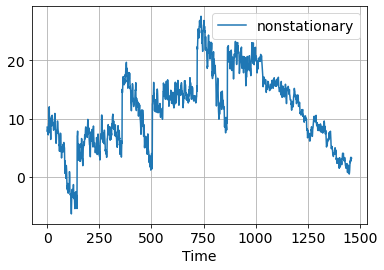

In [115]:
s = autocor2(time, 0.8) + pattern2series(pattern, time, period, amp=10) + trend(time, 0.02)
s2 = autocor2(time, 0.9, noise_std=0.5) + trend(time, -0.04)
plot_series(np.hstack([s[:1000], s2[1000:]+60]), time, label='nonstationary')